In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'mem_name'  : ['sumon', 'sohel', 'joy', 'shopnil', 'sayem', 'shawon', 'arfin', 'mehedi', 'mizan', 'akhter', 'ripon'],
    'house_rent': [2000, 2000, 1667, 1667, 1667, 1833, 1833, 1833, 2500, 2500, 1600],
    'utility'   : [535] * len(data['mem_name']),
    'bbazar_dep': [700] * len(data['mem_name']),
    'adjustment': [598] * len(data['mem_name']),
    'pers_bazar': [725, 0, 1095, 1085, 805, 490, 1190, 0, 585, 1345, 910],
    'no_of_meal': [23, 25, 15, 39, 21.5, 25, 27, 5, 30, 16, 20]
}
#print(len(data['mem_name']))

# Additional columns calculation
df = pd.DataFrame(data)
df['meal_cost'] = df['no_of_meal'] * 60.09
df['payable'] = df['house_rent'] + df['utility'] + df['bbazar_dep'] + df['meal_cost'] - df['adjustment'] - df['pers_bazar']
df['prev_bal'] = [0, 0, 0, 0, 0, 0, 180, 101, 0, 0, 0]  # Assuming previous balance is 0 for simplicity
df['net_payable'] = df['payable'] + df['prev_bal']
df['deposit'] = 0  # Assuming no deposit for simplicity
df['due'] = -df['net_payable'] - df['deposit']

# Format values
df['house_rent'] = df['house_rent'].astype(float).map("{:.2f}".format)
df['utility'] = df['utility'].astype(float).map("{:.2f}".format)
df['bbazar_dep'] = df['bbazar_dep'].astype(float).map("{:.2f}".format)
df['adjustment'] = df['adjustment'].astype(float).map("{:.2f}".format)
df['pers_bazar'] = df['pers_bazar'].astype(float).map("{:.2f}".format)
df['no_of_meal'] = df['no_of_meal'].astype(float).map("{:.2f}".format)
df['meal_cost'] = df['meal_cost'].astype(float).map("{:.2f}".format)
df['payable'] = df['payable'].astype(float).map("{:.2f}".format)
df['net_payable'] = df['net_payable'].round(0).astype(int)
df['due'] = df['due'].round(0).astype(int)

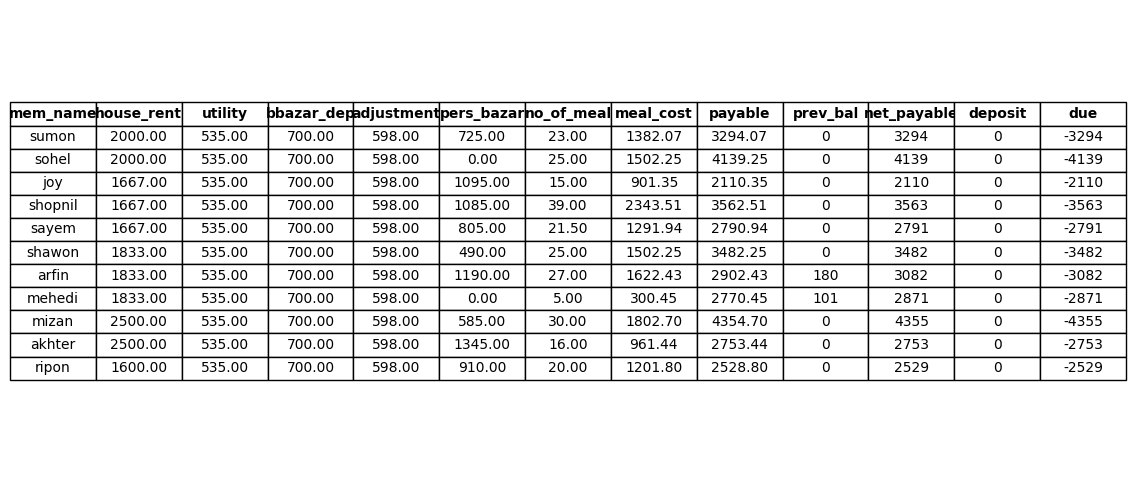

In [10]:
# Plotting the table
fig, ax = plt.subplots(figsize=(12, 6))  # Adjust the figure size as needed
ax.axis('tight')
ax.axis('off')

table_data = [df.columns.values.tolist()] + df.values.tolist()
table = ax.table(cellText=table_data, colLabels=None, cellLoc='center', loc='center')

# Adjust font size
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Scale the table to make it larger

# Adjust column width
for key, cell in table.get_celld().items():
    cell.set_edgecolor('black')
    if key[0] == 0:
        cell.set_text_props(weight='bold')
    cell.set_height(0.05)

plt.show()